In [2]:
from pylab import *
import matplotlib
import matplotlib.colors

In [54]:
names = ['meshk','mesh','vertsk','verts','icp'] #,'areas'
#data_20k_fullverts/ #data_monday_final_k100/
for namef in ['arma','bunny','dragon','happy','lucy']:
    res = [np.loadtxt('./{}_{}2.csv'.format(namef,n),delimiter=',') for n in names]


    angle_errors = []
    for result in res:
        #new_res = np.minimum(2*np.arccos(result[:,0]),2*np.arccos(-result[:,0]))
        new_res = np.clip(2*result[:,0]**2-1,1e-9,1-1e-9)
        new_res =np.arccos(new_res)
        new_res[np.isnan(new_res)] = np.pi
        angle_errors.append(new_res*180.0/np.pi)
    print(namef)
    #print((angle_errors[2].mean()-angle_errors[0].mean())/angle_errors[2].mean() *100)
    #print((res[2][:,1].mean()-res[0][:,1].mean())/res[2][:,1].mean() * 100)
    print((angle_errors[2].mean())/angle_errors[4].mean() *100)
    print((angle_errors[0].mean())/angle_errors[4].mean() *100)

    print((res[2][:,1].mean())/res[4][:,1].mean() *100)
    print((res[0][:,1].mean())/res[4][:,1].mean() *100)

names[0] = 'mesh\n(kmeans)'
names[1] = 'mesh\n(random)'
#names[2] = 'mesh (a)\n(kmeans)'
names[2] = 'points\n(kmeans)'
names[3] = 'points\n(random)'

arma
161.23288538173108
33.46825350745532
126.66485650083405
37.13251217543304
bunny
41.33836188134905
16.86552553422376
49.7313139335278
27.865764139326394
dragon
40.23313431194343
19.442233571052057
67.70358366874909
25.29685845915485
happy
85.35665552677307
27.19756710778042
101.32400587561952
26.774252410669607
lucy
122.2429773851123
35.449374011472315
94.59559288560084
23.276902423109036


Text(0, 0.5, 'translation error')

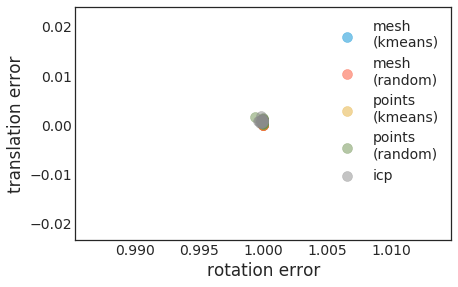

In [41]:
for x,l in zip(res,names):
    plt.scatter(np.sqrt(x[:,0]**2),x[:,1],label=l,s=100,alpha=0.5)
plt.legend()
plt.xlabel('rotation error')
plt.ylabel('translation error')


51.67606525430328

62.63586491532872

In [28]:
res[2].mean(0)

array([0.99992667, 0.61606489])

[0.2500876192617514, 0.2573666496409428, 1.2047939233769052, 2.686307671259988, 0.7472383320092946]
[0.1806028729764354, 0.19138139251714636, 0.6160648889339998, 1.031741410434375, 0.48637396824425655]


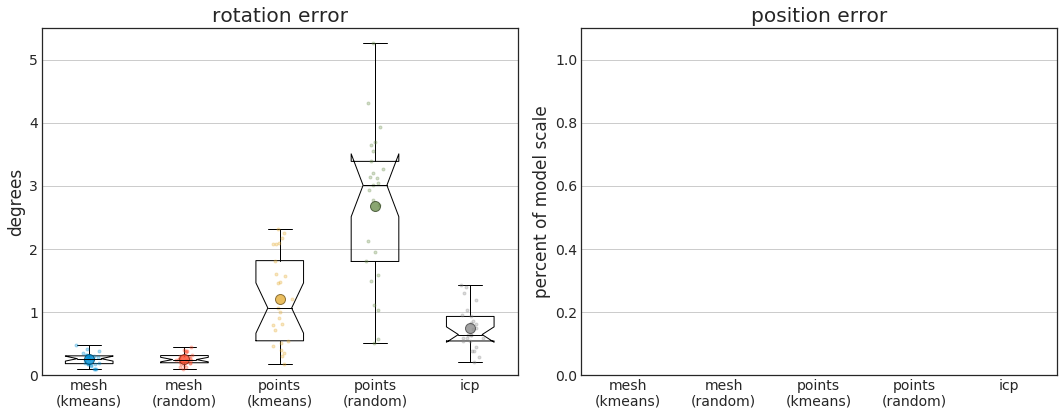

In [29]:
from matplotlib import rc
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
#plt.rcParams["font.family"] = "sans-serif"
rc('font',**{'family':'sans-serif','sans-serif':['cm']})
#plt.rcParams['font.sans-serif'] = ['Helvetica']
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
model_scale = np.sqrt((0.1513)**2 + (0.1483)**2 + (0.1144)**2)

angle_errors = []
for result in res:
    #new_res = np.minimum(2*np.arccos(result[:,0]),2*np.arccos(-result[:,0]))
    new_res = np.clip(2*result[:,0]**2-1,1e-9,1-1e-9)
    new_res =np.arccos(new_res)
    new_res[np.isnan(new_res)] = np.pi
    angle_errors.append(new_res*180.0/np.pi)

plt.boxplot([_ for _ in angle_errors],labels=names,notch=True,flierprops={'marker':''},medianprops={'color':'k'})
plt.title('rotation error')
plt.ylabel('degrees')
#plt.ylim(0,.05)
#plt.ylim(top=4,bottom=0)
plt.ylim(bottom=0)
for i,err in enumerate(res):
    y = angle_errors[i]
    x = np.random.normal(i+1, 0.05, size=len(y))
    p = plt.plot(x,y,'.',alpha=0.3)
    plt_color = matplotlib.colors.hex2color(p[0].get_color())
    clr2 = tuple(np.array(plt_color)*0.5)
    plt.plot(i+1,y.mean(),'.',c=plt_color,ms=20,alpha=0.8,mec=clr2,lw=1.0)
plt.ylim(top=5.5)
plt.grid(True,axis='y')
plt.subplot(1,2,2)

plt.boxplot([_[:,1]/model_scale * 100 for _ in res],labels=names,notch=True,flierprops={'marker':''},medianprops={'color':'k'})
#plt.ylim(0,0.01)
plt.title('position error')
plt.ylabel('percent of model scale')
#print([2*np.arccos(abs(_[:,0])).mean() for _ in res])
print([_.mean() for _ in angle_errors])

print([_[:,1].mean() for _ in res])
#print([2*np.arccos(abs(_[:,0])).max() for _ in res])

plt.ylim(bottom=0)
for i,err in enumerate(res):
    y = err[:,1]/model_scale * 100
    x = np.random.normal(i+1, 0.05, size=len(y))
    p = plt.plot(x,y,'.',alpha=0.3)
    plt_color = matplotlib.colors.hex2color(p[0].get_color())
    clr2 = tuple(np.array(plt_color)*0.5)
    plt.plot(i+1,y.mean(),'.',c=plt_color,ms=20,alpha=0.8,mec=clr2,lw=1.0)
#plt.ylim(top=0.025/0.05)
plt.ylim(top=1.1)
plt.grid(True,axis='y')
plt.tight_layout()


fig.savefig('new-viz-k100_2.pdf', facecolor=fig.get_facecolor(), edgecolor='none')

In [35]:
plt.rcParams

/Users/lkeselma/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.forma